**ESPECIALIZACIÓN EN CIENCIA DE DATOS E INTELIGENCIA ARTIFICIAL**

*Estudiantes*

Jonatan Andres Londoño Taborda

Felipe Londoño Mendoza


---

## Compresión de los datos

Este conjunto de datos analiza diversos índices de costo de vida relativos a la ciudad de Nueva York (NYC), la cual tiene un índice base del 100%.

A continuación, se presenta una descripción de cada índice y su significado:

- **Índice del Costo de Vida excluyendo alquiler (Cost of Living Index):** Este índice indica los precios relativos de bienes de consumo como alimentos, restaurantes, transporte y servicios públicos, excluyendo los gastos de alojamiento como el alquiler o la hipoteca. Por ejemplo, una ciudad con un índice de costo de vida de 120 se estima que es un 20% más cara que la ciudad de Nueva York (excluyendo el alquiler).

- **Índice de Alquiler (Rent Index):** Este índice estima los precios de alquiler de apartamentos en una ciudad en comparación con la ciudad de Nueva York. Si el índice de alquiler es 80, sugiere que los precios promedio de alquiler en esa ciudad son aproximadamente un 20% más bajos que en Nueva York.

- **Índice de Costo de Vida más Alquiler (Cost of Living Plus Rent Index):** Este índice estima el costo de bienes de consumo incluyendo el alquiler, en comparación con la ciudad de Nueva York.

- **Índice de Alimentos (Groceries Index):** Este índice proporciona una estimación de los precios de productos de supermercado en una ciudad con respecto a Nueva York. Numbeo utiliza pesos de productos del apartado “Mercados” para calcular este índice en cada ciudad.

- **Índice de Restaurantes (Restaurant Price Index):** Este índice compara los precios de comidas y bebidas en restaurantes y bares con los de la ciudad de Nueva York.

- **Poder Adquisitivo Local (Local Purchasing Power Index):** Este índice indica el poder adquisitivo relativo en una ciudad determinada, basado en el salario neto promedio. Un poder adquisitivo doméstico de 40 significa que los residentes con un salario promedio pueden adquirir, en promedio, un 60% menos de bienes y servicios en comparación con los residentes de la ciudad de Nueva York con un salario promedio.


In [4]:
import pandas as pd

In [5]:
Ruta = "Cost_of_Living_Index_by_Country_2024_with_continent.csv"

# Leer el archivo con pandas
datos = pd.read_csv(Ruta,sep=',')

datos.head()

,Rank,Country,Continent,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,Europe,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,North America,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,Europe,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,Asia,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,North America,76.6,19.0,48.9,80.8,69.4,43.5


In [6]:
#Resumen de las variables
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            121 non-null    int64  
 1   Country                         121 non-null    object 
 2   Continent                       121 non-null    object 
 3   Cost of Living Index            121 non-null    float64
 4   Rent Index                      121 non-null    float64
 5   Cost of Living Plus Rent Index  121 non-null    float64
 6   Groceries Index                 121 non-null    float64
 7   Restaurant Price Index          121 non-null    float64
 8   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 8.6+ KB


In [7]:
#Cargar las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler # Para transformar y estandarizar datos (Media 0, Desvesta = 1)
import scipy.stats as st
import statsmodels.api as sm

In [8]:
# #El resumen estadístico de nuestro conjunto de datos total.
datos.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,61.000000,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,35.073732,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,1.000000,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,31.000000,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,61.000000,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,91.000000,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,121.000000,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


<Axes: >

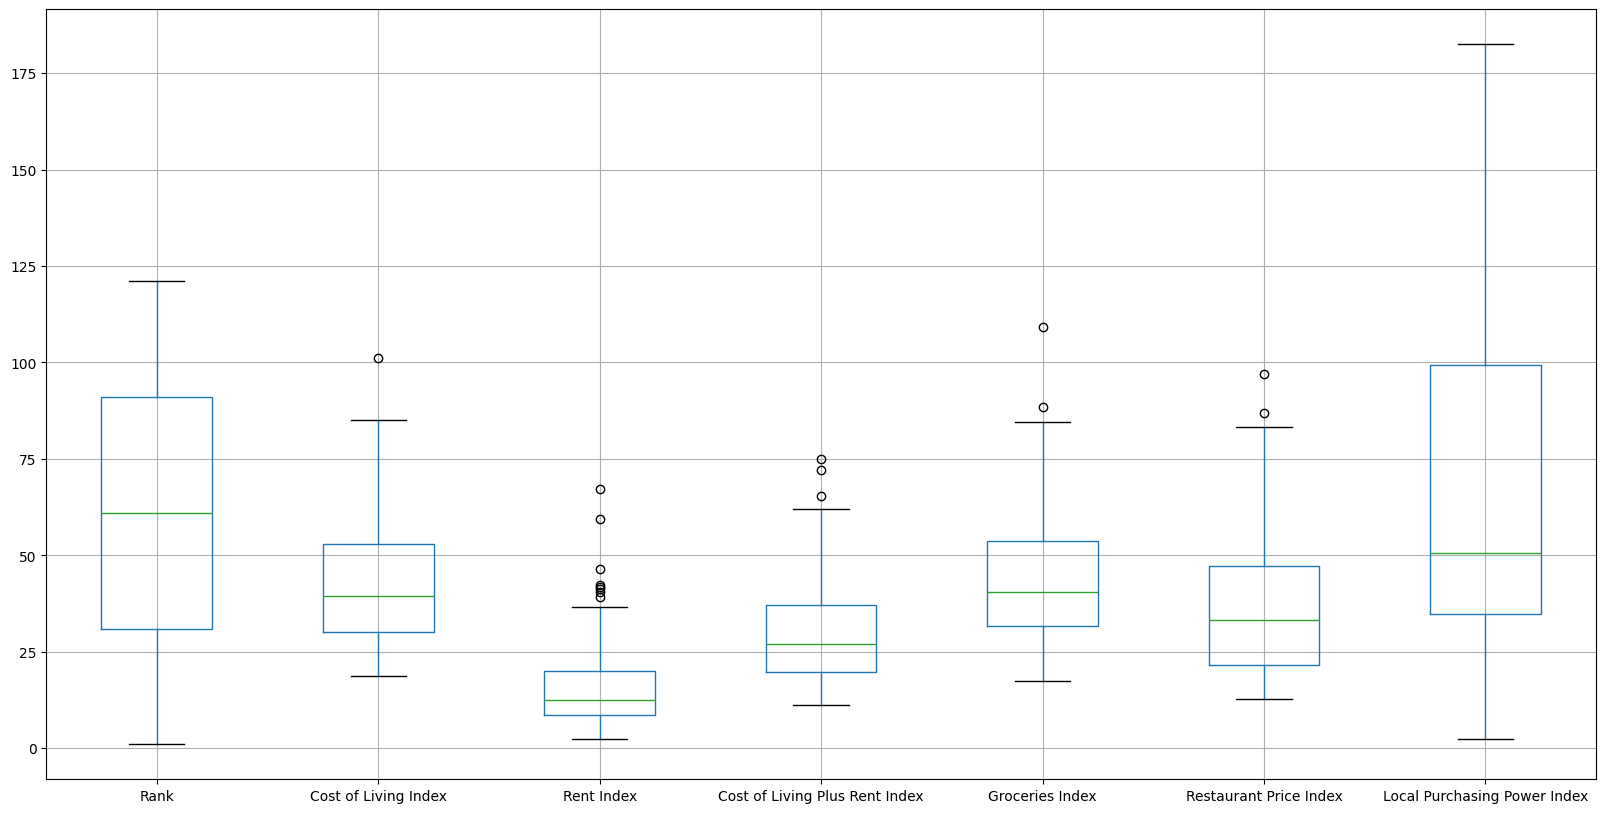

In [ ]:
datos.boxplot(figsize=(20,10)) # la escala de amplitud de los datos es amplia

In [10]:
#Separar las variables continuas de las demás
continuas=datos[["Cost of Living Index","Rent Index","Cost of Living Plus Rent Index","Groceries Index","Restaurant Price Index","Local Purchasing Power Index"]]
correlation_matrix=continuas.corr()

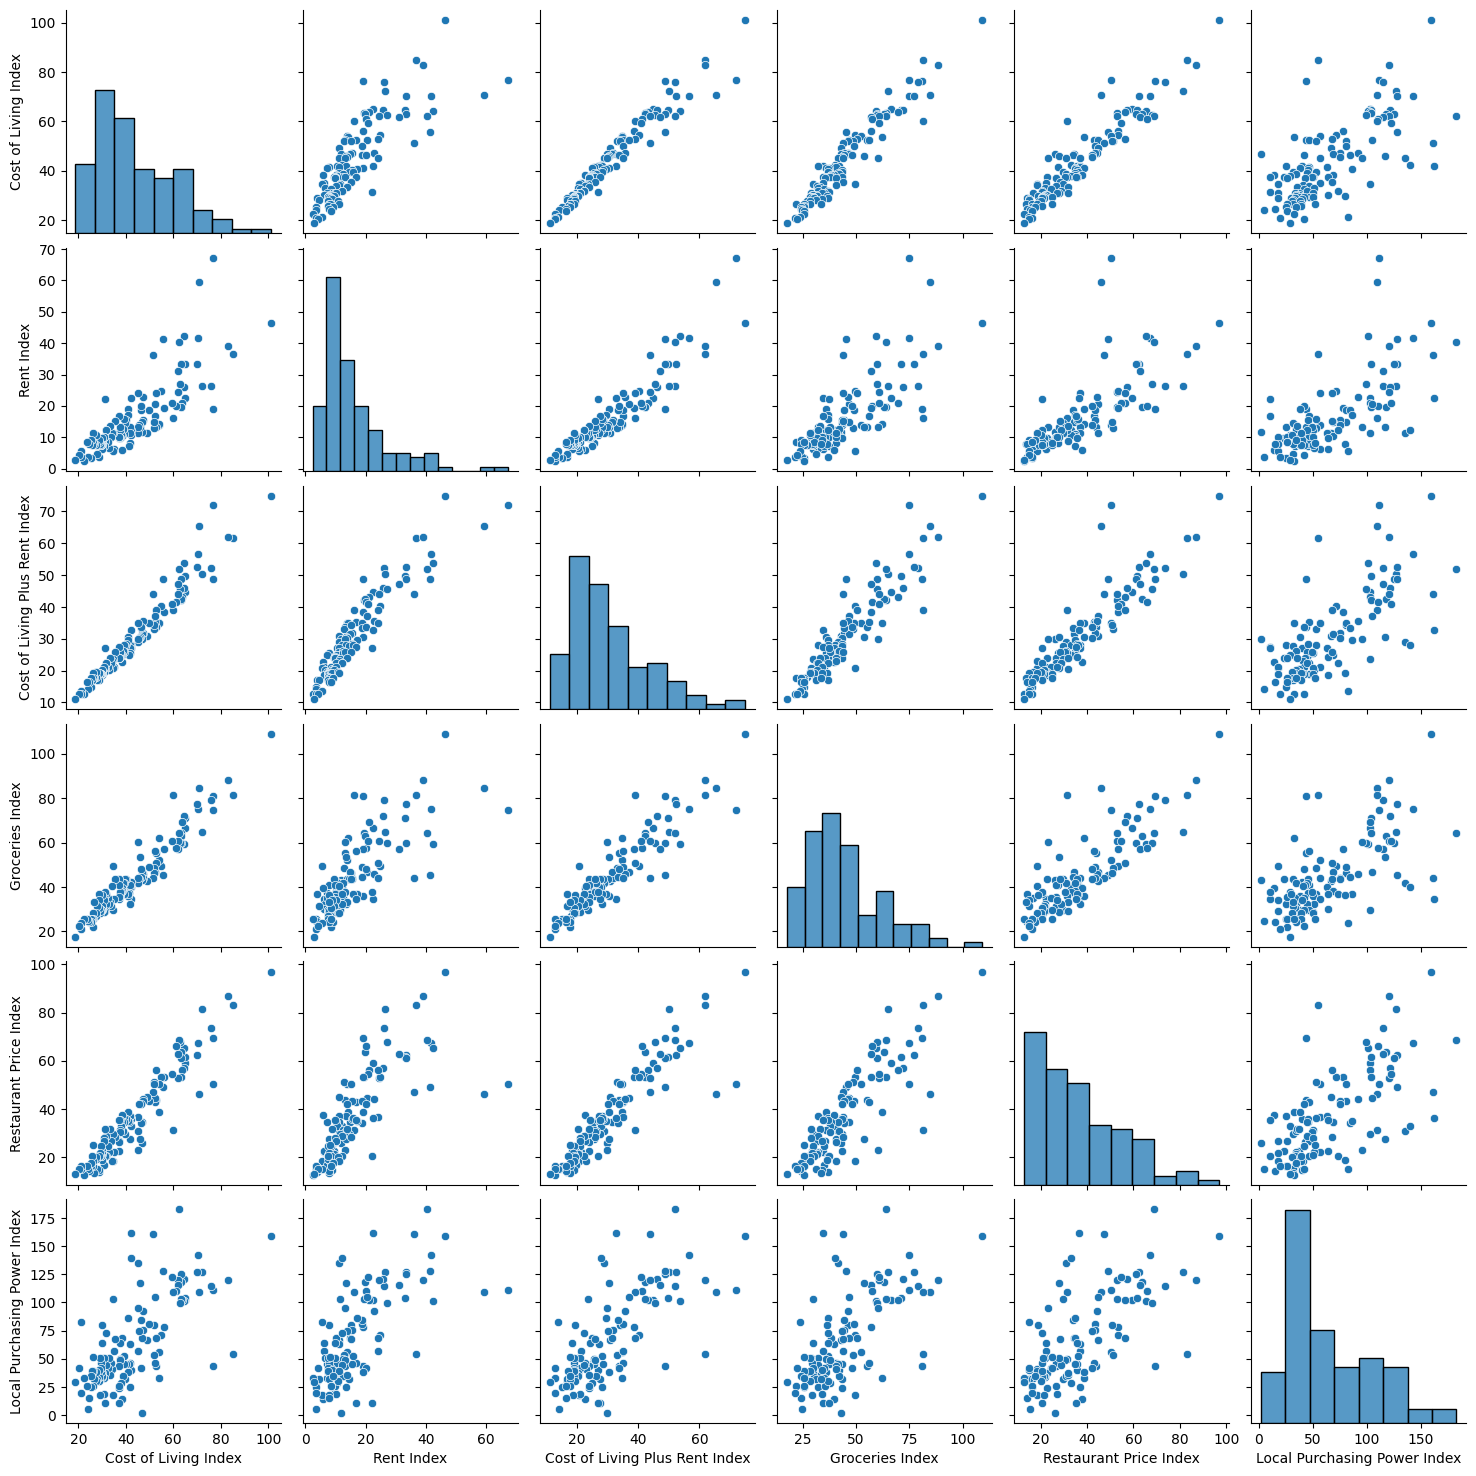

In [ ]:
sns.pairplot(continuas) # Des

Axes(0.125,0.11;0.62x0.77)


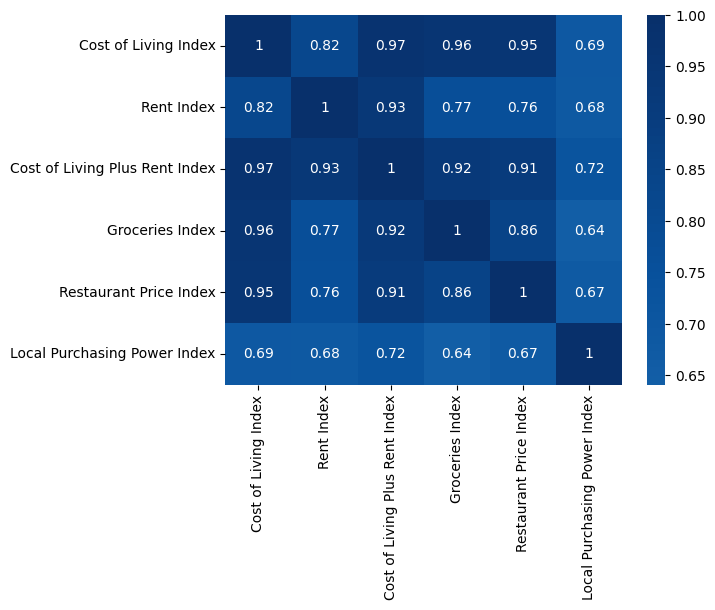

In [ ]:
#Se calcula la matriz de correlación
print(sns.heatmap(correlation_matrix, annot=True, cmap="Blues", center=0))#adicionar descripción

El objetivo es indagar si el indeice del poder adquisitivo aporta al incremento del indice de costo de vida sin incluir el arrendamiento (si tiene una relación lineal con la otra variable)

<Axes: xlabel='Cost of Living Index', ylabel='Continent'>

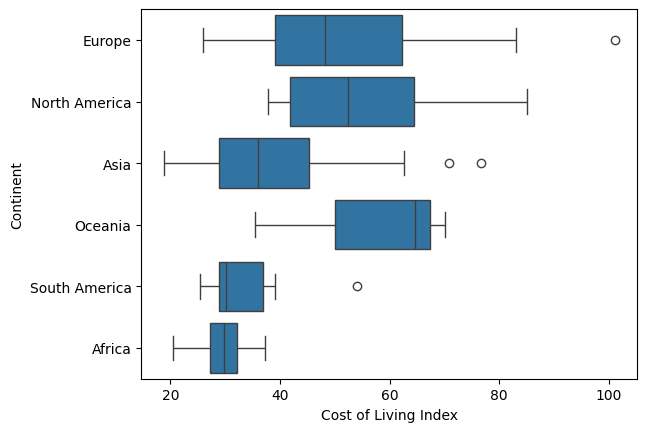

In [39]:
# 'BOX PLOT' Diagrama de caja y bigotes por continente y el inidice de costo de vida excluyendo el alquiler
sns.boxplot(x = 'Cost of Living Index', y = 'Continent', data = datos)

### Inferencia estadística por intervalos de confiaza

In [40]:
INDICE_EUROPA = datos.query('Continent == "Europe"')['Cost of Living Index']
INDICE_NORTEAMERICA = datos.query('Continent == "North America"')['Cost of Living Index']
INDICE_ASIA = datos.query('Continent == "Asia"')['Cost of Living Index']
INDICE_OCEANIA = datos.query('Continent == "Oceania"')['Cost of Living Index']
INDICE_SURAMERICA = datos.query('Continent == "South America"')['Cost of Living Index']
INDICE_AFRICA = datos.query('Continent == "Afirca"')['Cost of Living Index']

In [41]:
# Observando el total de datos registrados del gasto de viaje para las variables a comparar (INDICE_NORTEAMERICA y INDICE_ASIA)
len(INDICE_NORTEAMERICA), len(INDICE_ASIA)

(14, 38)

In [42]:
nivel_confianza = 0.95  # Nivel de confianza del 95%
n1 = len(INDICE_NORTEAMERICA) # tamaño de muestra 1 (INDICE_NORTEAMERICA)
n2 = len(INDICE_ASIA) # tamaño de muestra 2 (INDICE_ASIA)

# Medias de las variables a comparar
media_INDICE_CV_NORTEAMERICA = INDICE_NORTEAMERICA.mean()
media_INDICE_CV_ASIA = INDICE_ASIA.mean()

# Variazas de las variables a comparar
varianza_INDICE_CV_NORTEAMERICA = INDICE_NORTEAMERICA.var()
varianza_INDICE_CV_ASIA = INDICE_NORTEAMERICA.var()

# Calcular la diferencia de medias
dife_medias = media_INDICE_CV_NORTEAMERICA - media_INDICE_CV_ASIA

# Calcular el error estándar
error_estan1 = np.sqrt(varianza_INDICE_CV_NORTEAMERICA/n1)
error_estan2 = np.sqrt(varianza_INDICE_CV_ASIA/n2)
error_estan_dife = np.sqrt(varianza_INDICE_CV_NORTEAMERICA/n1
                            + varianza_INDICE_CV_ASIA/n2)

# Grados de libertad
gl1 = n1 - 1 # muestra 1 (INDICE_NORTEAMERICA)
gl2 = n2 - 1 # muestra 2 (INDICE_ASIA)
gl_i = n1 + n2 - 2 # diferencia de muestras independientes (tamaños iguales)
gl = ((varianza_INDICE_CV_NORTEAMERICA/n1 + varianza_INDICE_CV_ASIA/n2)**2 /
        (((varianza_INDICE_CV_NORTEAMERICA/n1)**2 / (n1 - 1)) +
         ((varianza_INDICE_CV_ASIA/n2)**2 / (n2 - 1)))) # diferencia de muestras independientes (tamaños diferentes)


# Valor Crítico
estadis_t1 = st.t.ppf((1 + nivel_confianza) / 2, df=gl1)  # Valor crítico de t (muestra 1)
estadis_t2 = st.t.ppf((1 + nivel_confianza) / 2, df=gl2)  # Valor crítico de t (muestra 2)
estadis_t = st.t.ppf((1 + nivel_confianza) / 2, df=gl)  # Valor crítico de t (diferencia de muestras)

# Calcular el intervalo de confianza utilizando la distribución t de Student
lim_inf1 = media_INDICE_CV_NORTEAMERICA - estadis_t1 * error_estan1
lim_sup1 = media_INDICE_CV_NORTEAMERICA + estadis_t1 * error_estan1
lim_inf2 = media_INDICE_CV_ASIA - estadis_t2 * error_estan2
lim_sup2 = media_INDICE_CV_ASIA + estadis_t2 * error_estan2
lim_inf = dife_medias - estadis_t * error_estan_dife
lim_sup = dife_medias + estadis_t * error_estan_dife

# Resultados
print(f"Intervalo de confianza del {nivel_confianza*100}% para la media de INDICE_NORTEAMERICA:", (float(lim_inf1), float(lim_sup1)))
print(f"Intervalo de confianza del {nivel_confianza*100}% para la media de INDICE_ASIA:", (float(lim_inf2), float(lim_sup2)))
print(f"Intervalo de confianza del {nivel_confianza*100}% para la diferencia de medias:", (float(lim_inf), float(lim_sup)))

Intervalo de confianza del 95.0% para la media de INDICE_NORTEAMERICA: (46.20321120219549, 63.56821736923308)
Intervalo de confianza del 95.0% para la media de INDICE_ASIA: (34.02039254399982, 43.90592324547386)
Intervalo de confianza del 95.0% para la diferencia de medias: (6.202424007906034, 25.642688774048864)


### Regresión lineal

Text(0.5, 1.0, 'Histograma')

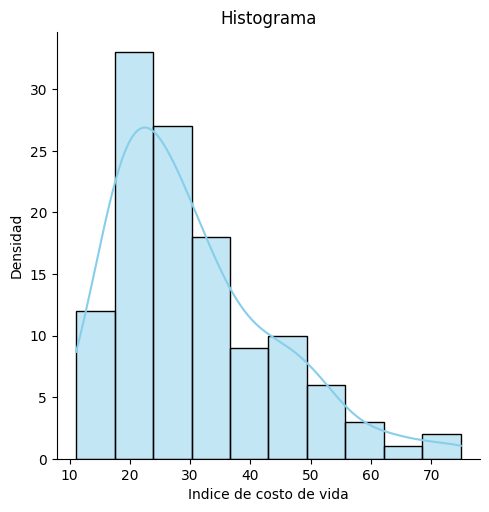

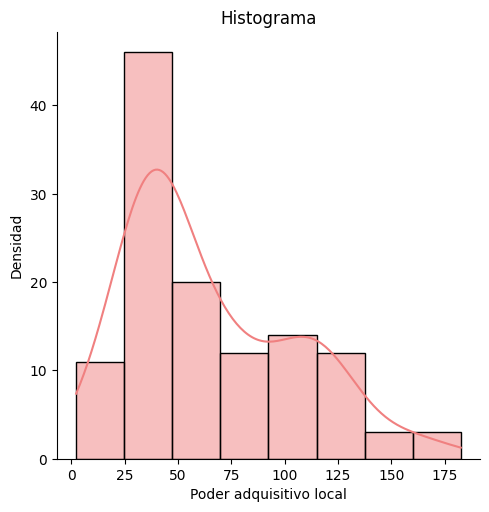

In [13]:
sns.displot(datos['Cost of Living Plus Rent Index'], color='skyblue', kde=True) # Se puede remover el argumento 'bins'
plt.xlabel('Indice de costo de vida')
plt.ylabel('Densidad')
plt.title('Histograma')

sns.displot(datos['Local Purchasing Power Index'], color='lightcoral', kde=True) # Se puede remover el argumento 'bins'
plt.xlabel('Poder adquisitivo local')
plt.ylabel('Densidad')
plt.title('Histograma')


 Poder adquisitivo local


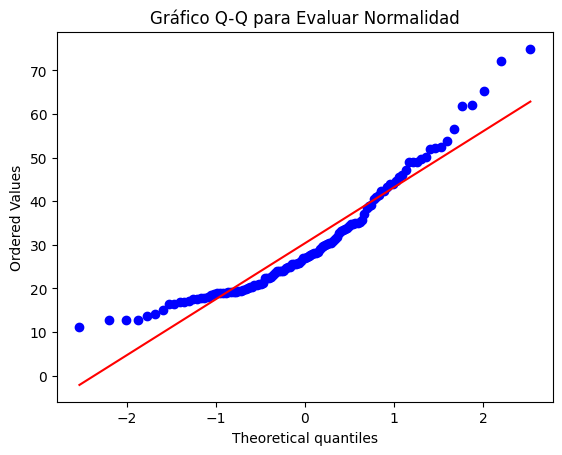


 Indice de costo de vida


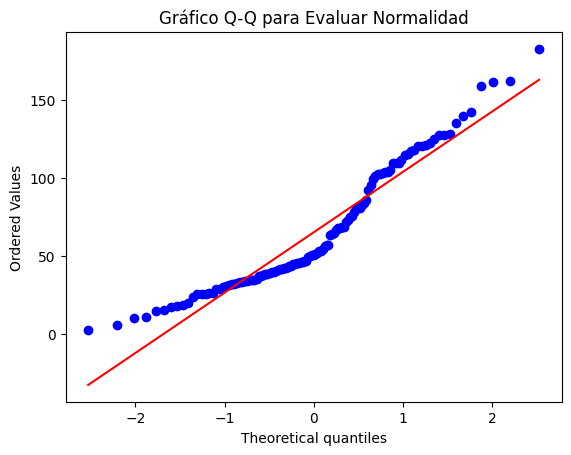

In [14]:
# Q-Q Plot
st.probplot(datos['Cost of Living Plus Rent Index'], dist="norm", plot=plt)
plt.title("Gráfico Q-Q para Evaluar Normalidad")
print('\n', 'Poder adquisitivo local')
plt.show()

st.probplot(datos['Local Purchasing Power Index'], dist="norm", plot=plt)
plt.title("Gráfico Q-Q para Evaluar Normalidad")
print('\n', 'Indice de costo de vida')
plt.show()

In [15]:
# Prueba de Shapiro-Wilk, esta prueba nos permite saber si los datos siguen una distribución normal a través de una prueba de hipotesis
alfa = 0.05  # Nivel de significancia
estadistico1, valor_p1 = st.shapiro(datos['Cost of Living Plus Rent Index'])
estadistico2, valor_p2 = st.shapiro(datos['Local Purchasing Power Index'])

# Mostrar resultados para variable 'Cost of Living Plus Rent Index'
print("Variable: Cost of Living Plus Rent Index")
print(f"Estadístico de prueba: {estadistico1:.4f}")
print(f"Valor p: {valor_p1:.4f}")
print(f"Nivel de significancia: {alfa:.2f}")

# Interpretación
print('H_0: La variable Local Purchasing Power Index sigue una distribución normal.')
print('H_1: La variable Local Purchasing Power Index no sigue una distribución normal.')
if valor_p1 > alfa:
    print("No se rechaza la hipótesis nula: Los datos siguen una distribución normal.", '\n')
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.", '\n')

# Mostrar resultados para variable 'Cost of Living Index'
print("Variable: Cost of Living Index")
print(f"Estadístico de prueba: {estadistico2:.4f}")
print(f"Valor p: {valor_p2:.4f}")
print(f"Nivel de significancia: {alfa:.2f}")

# Interpretación
print('H_0: La variable Cost of Living Index sigue una distribución normal.')
print('H_1: La variable Cost of Living Index no sigue una distribución normal.')
if valor_p2 > alfa:
    print("No se rechaza la hipótesis nula: Los datos siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.")

Variable: Cost of Living Plus Rent Index
Estadístico de prueba: 0.9115
Valor p: 0.0000
Nivel de significancia: 0.05
H_0: La variable Local Purchasing Power Index sigue una distribución normal.
H_1: La variable Local Purchasing Power Index no sigue una distribución normal.
Se rechaza la hipótesis nula: Los datos no siguen una distribución normal. 

Variable: Cost of Living Index
Estadístico de prueba: 0.9248
Valor p: 0.0000
Nivel de significancia: 0.05
H_0: La variable Cost of Living Index sigue una distribución normal.
H_1: La variable Cost of Living Index no sigue una distribución normal.
Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.


In [23]:
escala = StandardScaler()

#la idea es entandarizar solo las variables que voy a trabajar debido a que una vez probado el test no se dio la normalidad


datos_estandarizados = pd.DataFrame( escala.fit_transform(datos.select_dtypes(include='number')))
print(datos_estandarizados)

            0         1         2         3         4         5         6
0   -1.717795  3.578488  2.679021  3.372158  3.819431  3.328965  2.375465
1   -1.689165  2.577288  1.816726  2.380394  2.200306  2.575493 -0.266315
2   -1.660535  2.452916  2.036699  2.395536  2.600672  2.767986  1.400976
3   -1.631905  2.061142  4.500401  3.160178  1.788166  0.766062  1.167504
4   -1.603275  2.054923  0.259314  1.403773  2.153205  1.811022 -0.548004
..        ...       ...       ...       ...       ...       ...       ...
116  1.603275 -1.309356 -1.201309 -1.329254 -1.090932 -1.301860 -0.811928
117  1.631905 -1.390198 -0.919743 -1.261118 -1.202799 -1.175365  0.444250
118  1.660535 -1.402635 -1.086923 -1.336825 -1.355880 -1.114867 -1.144371
119  1.689165 -1.439947 -1.034129 -1.336825 -1.297003 -1.169865 -0.586070
120  1.717795 -1.539445 -1.166113 -1.457956 -1.573726 -1.296360 -0.913437

[121 rows x 7 columns]


In [24]:
datos_estandarizados.describe()

,0,1,2,3,4,5,6
count,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02
mean,3.303143e-17,1.413011e-16,1.651571e-16,2.018587e-16,-1.045995e-16,2.697567e-16,-1.578168e-16
std,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00
min,-1.717795e+00,-1.539445e+00,-1.201309e+00,-1.457956e+00,-1.573726e+00,-1.301860e+00,-1.593550e+00
25%,-8.588975e-01,-8.305213e-01,-6.645741e-01,-7.993044e-01,-7.435565e-01,-8.178781e-01,-7.687863e-01
50%,0.000000e+00,-2.521886e-01,-3.214157e-01,-2.542132e-01,-2.195489e-01,-1.854021e-01,-3.678245e-01
75%,8.588975e-01,5.748893e-01,3.561024e-01,5.028579e-01,5.576309e-01,5.900686e-01,8.705893e-01
max,1.717795e+00,3.578488e+00,4.500401e+00,3.372158e+00,3.819431e+00,3.328965e+00,2.979446e+00


Text(0.5, 1.0, 'Histograma')

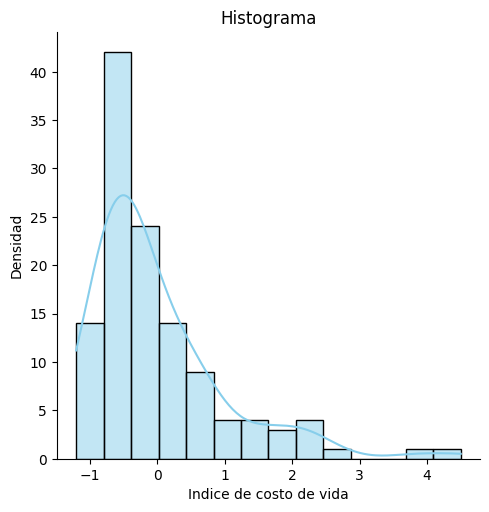

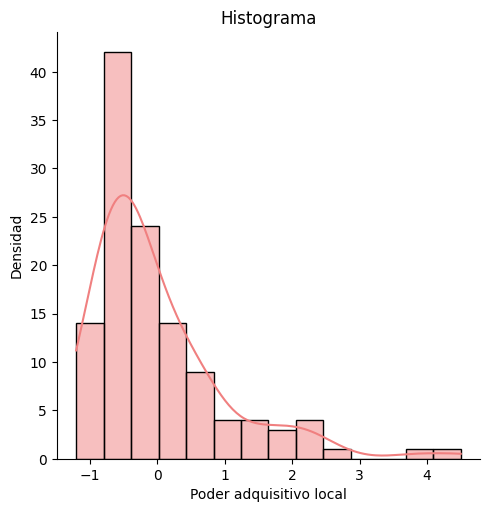

In [30]:
sns.displot(datos_estandarizados[2], color='skyblue', kde=True) # Se puede remover el argumento 'bins'
plt.xlabel('Indice de costo de vida')
plt.ylabel('Densidad')
plt.title('Histograma')

sns.displot(datos_estandarizados[2], color='lightcoral', kde=True) # Se puede remover el argumento 'bins'
plt.xlabel('Poder adquisitivo local')
plt.ylabel('Densidad')
plt.title('Histograma')

In [27]:
# Prueba de Shapiro-Wilk, esta prueba nos permite saber si los datos siguen una distribución normal a través de una prueba de hipotesis
alfa = 0.05  # Nivel de significancia
estadistico1, valor_p1 = st.shapiro(datos_estandarizados[2])
estadistico2, valor_p2 = st.shapiro(datos_estandarizados[6])

# Mostrar resultados para variable 'Cost of Living Plus Rent Index'
print("Variable: Cost of Living Plus Rent Index")
print(f"Estadístico de prueba: {estadistico1:.4f}")
print(f"Valor p: {valor_p1:.4f}")
print(f"Nivel de significancia: {alfa:.2f}")

# Interpretación
print('H_0: La variable Local Purchasing Power Index sigue una distribución normal.')
print('H_1: La variable Local Purchasing Power Index no sigue una distribución normal.')
if valor_p1 > alfa:
    print("No se rechaza la hipótesis nula: Los datos siguen una distribución normal.", '\n')
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.", '\n')

# Mostrar resultados para variable 'Cost of Living Index'
print("Variable: Cost of Living Index")
print(f"Estadístico de prueba: {estadistico2:.4f}")
print(f"Valor p: {valor_p2:.4f}")
print(f"Nivel de significancia: {alfa:.2f}")

# Interpretación
print('H_0: La variable Cost of Living Index sigue una distribución normal.')
print('H_1: La variable Cost of Living Index no sigue una distribución normal.')
if valor_p2 > alfa:
    print("No se rechaza la hipótesis nula: Los datos siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.")

Variable: Cost of Living Plus Rent Index
Estadístico de prueba: 0.8243
Valor p: 0.0000
Nivel de significancia: 0.05
H_0: La variable Local Purchasing Power Index sigue una distribución normal.
H_1: La variable Local Purchasing Power Index no sigue una distribución normal.
Se rechaza la hipótesis nula: Los datos no siguen una distribución normal. 

Variable: Cost of Living Index
Estadístico de prueba: 0.9248
Valor p: 0.0000
Nivel de significancia: 0.05
H_0: La variable Cost of Living Index sigue una distribución normal.
H_1: La variable Cost of Living Index no sigue una distribución normal.
Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.


In [35]:
#transfomración box-cox
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='box-cox')

#pd.DataFrame(

datos_yeo_johnson = pd.DataFrame(transformer.fit_transform(datos.select_dtypes(include='number')))


In [36]:
datos_yeo_johnson.describe()

,0,1,2,3,4,5,6
count,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02
mean,1.541467e-16,6.863197e-16,-6.973302e-16,3.115965e-15,-3.677499e-15,-9.450659e-16,3.073758e-16
std,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00
min,-2.082241e+00,-2.333507e+00,-2.686017e+00,-2.461560e+00,-2.715187e+00,-1.930287e+00,-2.898948e+00
25%,-7.872872e-01,-8.381581e-01,-6.583881e-01,-8.187895e-01,-7.283753e-01,-8.180267e-01,-7.071500e-01
50%,9.585172e-02,-5.592059e-02,-6.739161e-02,-2.668485e-02,-1.014061e-03,6.210283e-02,-1.930477e-01
75%,8.583474e-01,7.407998e-01,6.790354e-01,7.206571e-01,7.579276e-01,7.757213e-01,9.354951e-01
max,1.551291e+00,2.355095e+00,2.498437e+00,2.204659e+00,2.385183e+00,2.175345e+00,2.223089e+00


In [37]:
# Prueba de Shapiro-Wilk, esta prueba nos permite saber si los datos siguen una distribución normal a través de una prueba de hipotesis
alfa = 0.05  # Nivel de significancia
estadistico1, valor_p1 = st.shapiro(datos_yeo_johnson[2])
estadistico2, valor_p2 = st.shapiro(datos_yeo_johnson[6])

# Mostrar resultados para variable 'Cost of Living Plus Rent Index'
print("Variable: Cost of Living Plus Rent Index")
print(f"Estadístico de prueba: {estadistico1:.4f}")
print(f"Valor p: {valor_p1:.4f}")
print(f"Nivel de significancia: {alfa:.2f}")

# Interpretación
print('H_0: La variable Local Purchasing Power Index sigue una distribución normal.')
print('H_1: La variable Local Purchasing Power Index no sigue una distribución normal.')
if valor_p1 > alfa:
    print("No se rechaza la hipótesis nula: Los datos siguen una distribución normal.", '\n')
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.", '\n')

# Mostrar resultados para variable 'Cost of Living Index'
print("Variable: Cost of Living Index")
print(f"Estadístico de prueba: {estadistico2:.4f}")
print(f"Valor p: {valor_p2:.4f}")
print(f"Nivel de significancia: {alfa:.2f}")

# Interpretación
print('H_0: La variable Cost of Living Index sigue una distribución normal.')
print('H_1: La variable Cost of Living Index no sigue una distribución normal.')
if valor_p2 > alfa:
    print("No se rechaza la hipótesis nula: Los datos siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.")

Variable: Cost of Living Plus Rent Index
Estadístico de prueba: 0.9916
Valor p: 0.6787
Nivel de significancia: 0.05
H_0: La variable Local Purchasing Power Index sigue una distribución normal.
H_1: La variable Local Purchasing Power Index no sigue una distribución normal.
No se rechaza la hipótesis nula: Los datos siguen una distribución normal. 

Variable: Cost of Living Index
Estadístico de prueba: 0.9795
Valor p: 0.0620
Nivel de significancia: 0.05
H_0: La variable Cost of Living Index sigue una distribución normal.
H_1: La variable Cost of Living Index no sigue una distribución normal.
No se rechaza la hipótesis nula: Los datos siguen una distribución normal.
